In [1]:
%pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.4/544.4 kB 8.6 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat

In [31]:
raw_welfare = pd.read_spss("./data/Koweps_hpwc14_2019_beta2.sav")

In [32]:
welfare = raw_welfare.copy()

In [33]:
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [34]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [35]:
welfare.shape

(14418, 830)

In [36]:
welfare = welfare.rename(
    columns={
        'h14_g3' : 'sex',
        'h14_g4' : 'birth',
        'h14_g10' : 'marriage_type',
        'h14_g11':'religion',
        'p1402_8aq1' : 'income',
        'h14_eco9' : 'code_job',
        'h14_reg7': 'code_region'
    }
)

In [37]:
welfare[['sex','birth','marriage_type', 'religion', 'income', 'code_job', 'code_region']]

,sex,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [38]:
welfare['sex'].dtype

dtype('float64')

In [39]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [40]:
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex']) # np.where(조건, 조건에 부합할 경우, 아닌 경우)
welfare['sex'].isna().sum()

0

In [41]:
welfare['sex'] = np.where(welfare['sex']== 1, 'male', 'female')

In [42]:
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

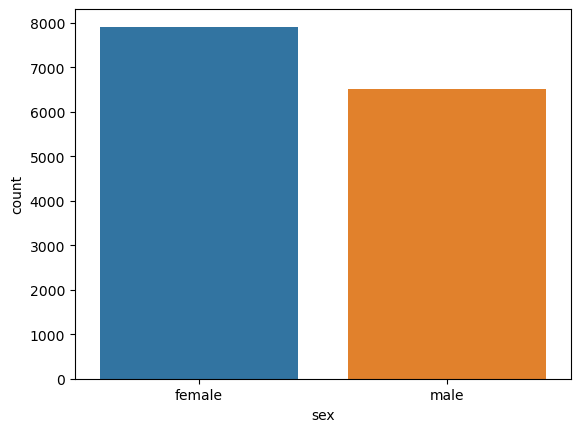

In [43]:
sns.countplot(data=welfare, x='sex')

In [44]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='Count'>

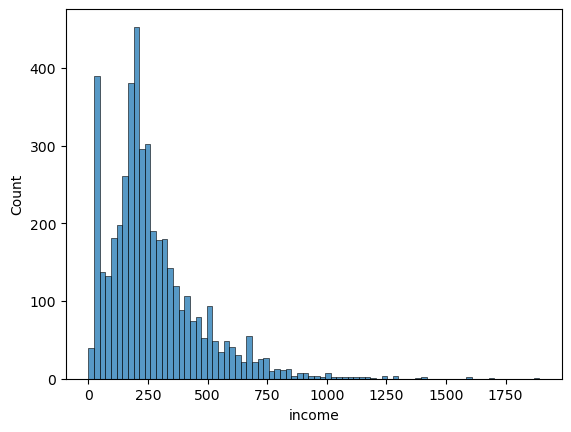

In [45]:
sns.histplot(data=welfare, x='income')

In [46]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [47]:
welfare['income'].isna().sum()

9884

In [48]:
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [49]:
welfare['income'].isna().sum()

9884

In [50]:
sex_income = welfare.dropna(subset=['income']).groupby('sex', as_index=False).agg(mean_income = ('income', 'mean'))

In [51]:
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

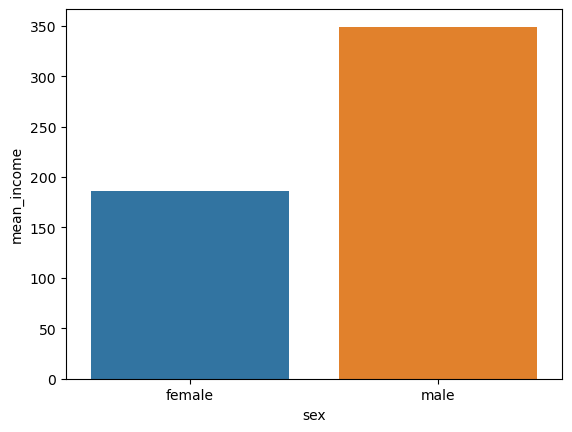

In [52]:
sns.barplot(data = sex_income, x='sex', y='mean_income')

In [53]:
welfare['birth'].dtypes

dtype('float64')

In [54]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='birth', ylabel='Count'>

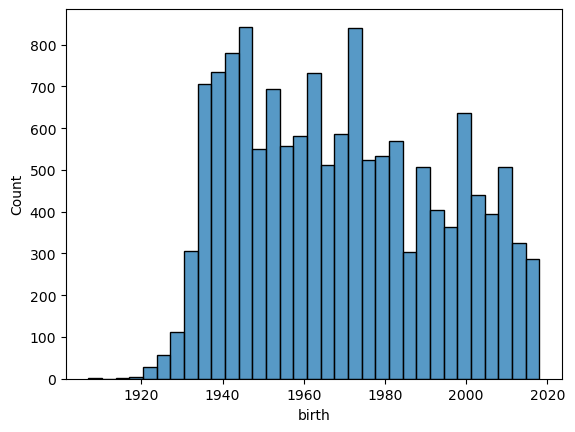

In [27]:
sns.histplot(data=welfare, x='birth')

In [55]:
welfare['birth'].isna().sum()

0

In [56]:
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

In [57]:
welfare['birth'].isna().sum()

0

In [58]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)

In [59]:
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

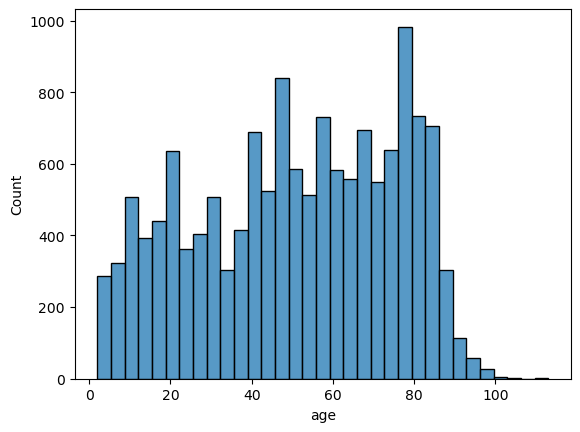

In [60]:
sns.histplot(data=welfare, x='age')

In [61]:
age_income = welfare.dropna(subset= 'income').groupby('age').agg(mean_income = ('income', 'mean'))

In [62]:
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='mean_income'>

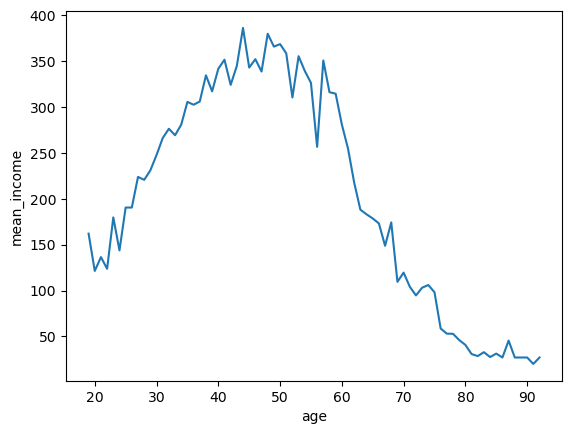

In [63]:
sns.lineplot(data=age_income, x='age', y='mean_income')

In [64]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [66]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                         np.where(welfare['age'] <= 59, 'middle', 'old')))

In [67]:
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

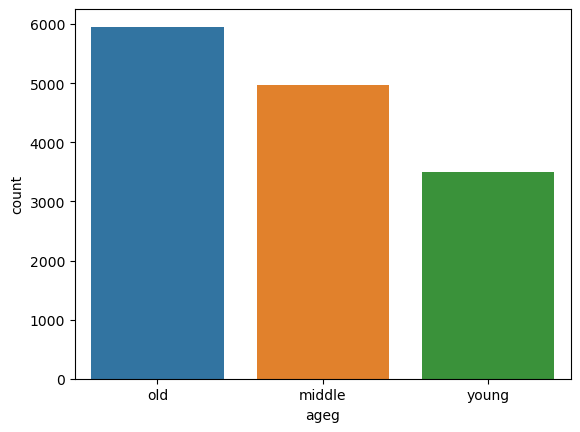

In [68]:
sns.countplot(data = welfare, x = 'ageg')

In [69]:
ageg_income = welfare.dropna(subset = 'income').groupby('ageg', as_index= False).agg(mean_income = ('income', 'mean'))

In [73]:
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='mean_income'>

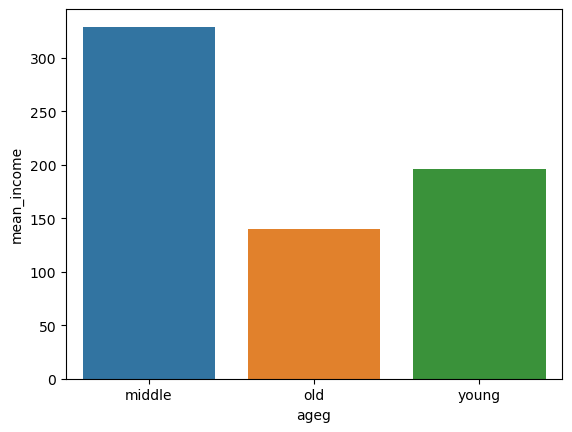

In [74]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

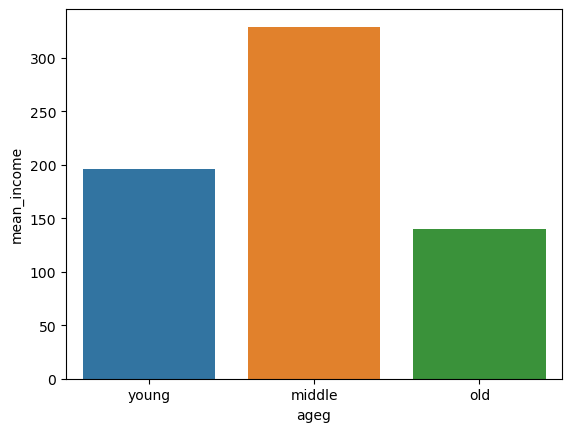

In [75]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])

In [76]:
sex_income = welfare.dropna(subset=['income']).groupby(['ageg', 'sex'], as_index=False).agg(mean_income = ('income', 'mean'))

In [77]:
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

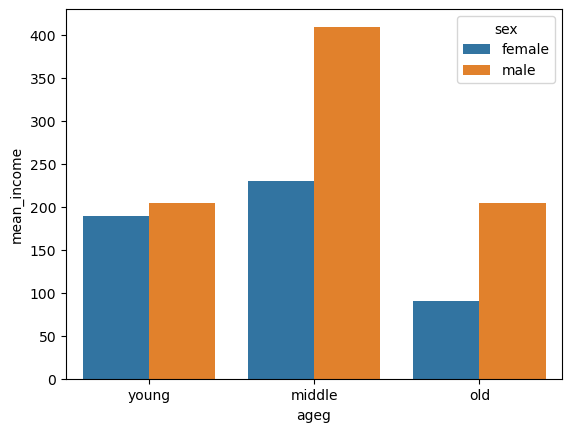

In [78]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex', order = ['young', 'middle', 'old'])

In [79]:
sex_age = welfare.dropna(subset=['income']).groupby(['age', 'sex'], as_index= False).agg(mean_income = ('income', 'mean'))

In [80]:
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='mean_income'>

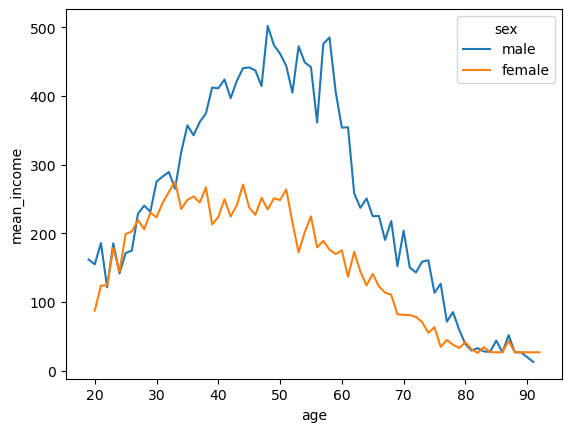

In [81]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

In [84]:
welfare['code_job'].dtypes

dtype('float64')

In [85]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [83]:
list_job = pd.read_excel("./data/Koweps_Codebook_2019.xlsx", sheet_name='직종코드')

In [87]:
list_job.head(10)

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
5,132,보험 및 금융 관리자
6,133,보건 및 사회복지 관련 관리자
7,134,문화∙예술 관련 관리자
8,135,정보 통신 관련 관리자
9,139,기타 전문 서비스 관리자


In [88]:
list_job.shape

(156, 2)

In [89]:
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [91]:
welfare.dropna(subset= ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [92]:
job_income = welfare.dropna(subset=['job', 'income']).groupby('job', as_index=False).agg(mean_income=('income', 'mean'))

In [93]:
job_income

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경∙청소 및 경비 관련 관리자,201.000000
145,환경공학∙가스·에너지 기술자 및 시험원,511.000000


In [94]:
top10 = job_income.sort_values('mean_income', ascending= False).head(10)

In [95]:
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [101]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

<Axes: xlabel='mean_income', ylabel='job'>

/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


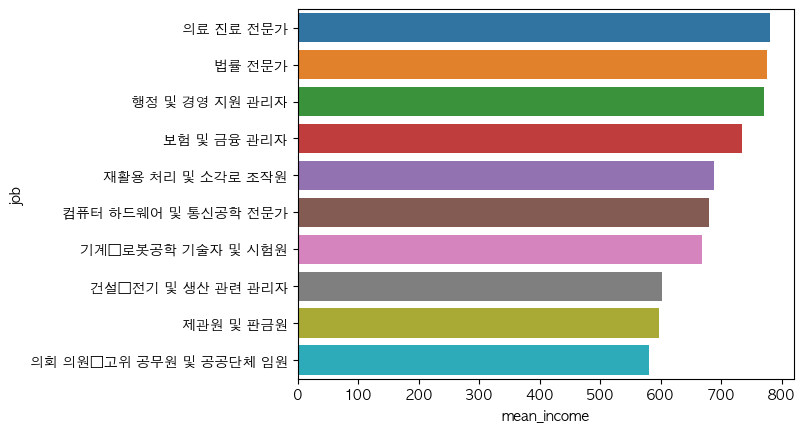

In [102]:
sns.barplot(data = top10, y = 'job', x = 'mean_income')

In [103]:
bottom10 = job_income.sort_values('mean_income').head(10)

In [104]:
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 200.0)]

/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


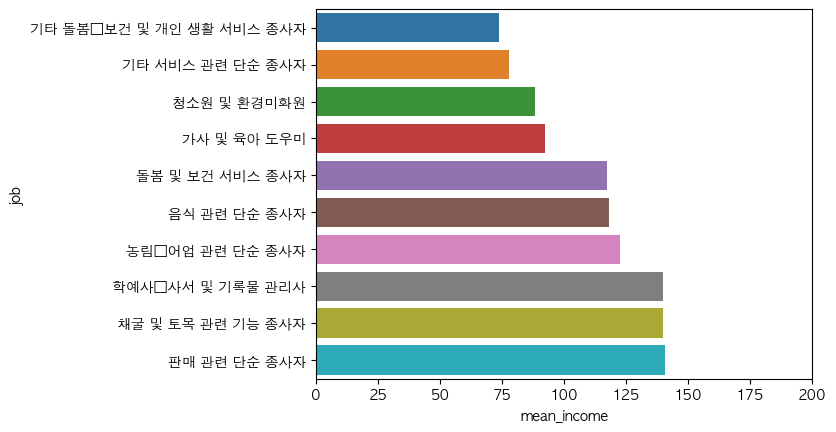

In [107]:
sns.barplot(data = bottom10, y = 'job', x = 'mean_income').set(xlim = (0, 200))